<a href="https://colab.research.google.com/github/PriyanshiMehta650/CODSOFT/blob/main/Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Movie Rating Prediction**

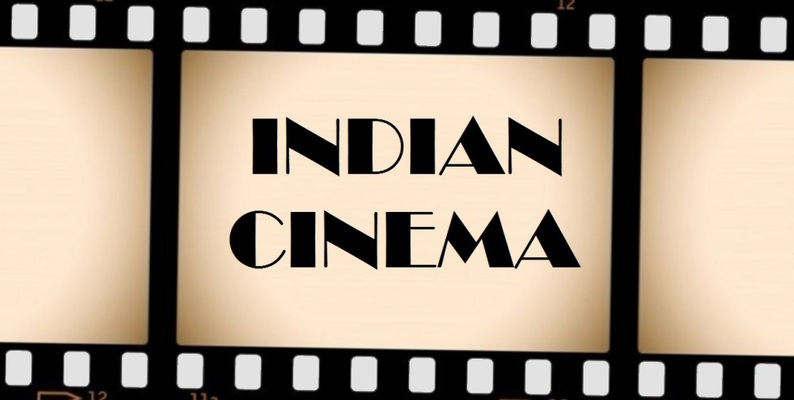

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score,accuracy_score
#visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
movies = pd.read_csv('movies.csv', encoding='latin-1')

In [ ]:
movies.head()

In [ ]:
movies.describe()

In [ ]:
movies.info()

In [ ]:
movies.columns

**VISUALIZATION**

In [ ]:
# 1. Distribution of Ratings
sns.histplot(movies['Rating'])
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# Group movies by director and calculate average rating
top_directors = movies.groupby('Director')['Rating'].mean().sort_values(ascending=False).head(10)
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors by Average Movie Rating')
plt.xlabel('Average Rating')
plt.ylabel('Director')
plt.show()
print(top_directors)

In [ ]:
# Combine all actors into a single column
all_actors = pd.concat([movies['Actor 1'], movies['Actor 2'], movies['Actor 3']]).dropna().reset_index(drop=True)

# Calculate average rating for each actor
actor_ratings_1 = movies.groupby(['Actor 1'])['Rating'].mean()
actor_ratings_2 = movies.groupby(['Actor 2'])['Rating'].mean()
actor_ratings_3 = movies.groupby(['Actor 3'])['Rating'].mean()

# Combine the Series, handling missing values
actor_ratings = pd.concat([actor_ratings_1, actor_ratings_2, actor_ratings_3]).groupby(level=0).mean().sort_values(ascending=False)

top_10_actors = actor_ratings.head(10)

In [ ]:
# Plot the results
plt.figure(figsize=(10, 6))
top_10_actors.plot(kind='bar')
plt.title('Top 10 Actors by Average Movie Rating')
plt.xlabel('Actor')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(top_10_actors)

In [ ]:
# 3. Correlation Heatmap
# Select only numeric columns for correlation calculation
numeric_movies = movies.select_dtypes(include=['float', 'int'])
corr = numeric_movies.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
N = 10
top_durations = movies.sort_values('Duration', ascending=False).head(N)

# Create a grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Name', y='Rating', hue='Duration', data=top_durations)
plt.title(f'Top {N} Movie Durations and Ratings')
plt.xlabel('Movie Name')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
N = 10  # Set the desired number of unique top durations

# Sort by duration, get top N, and then get unique values
top_unique_durations = movies.sort_values('Duration', ascending=False)['Duration'].head(N).unique()

print(top_unique_durations)

In [ ]:
# Select top N genres by count
top_genres = movies['Genre'].value_counts().nlargest(10).index
sns.boxplot(x='Genre', y='Rating', data=movies[movies['Genre'].isin(top_genres)])
plt.title('Movie Ratings by Top 10 Genres')
plt.xticks(rotation=45)
plt.show()
print (top_genres)

In [ ]:
features = ['Year', 'Duration', 'Genre', 'Votes', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
X = movies[features]
y = movies['Rating']

In [ ]:
# Split the data into training and testing sets
X = movies.drop('Rating', axis=1)
y = movies['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Convert all columns in X_train and X_test to numeric, coercing errors to NaN
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')

# Fill NaN values (if any were created during conversion) with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

model = LinearRegression()
model.fit(X_train, y_train)  # Now the model fitting should work

In [ ]:
# Define the lists for genres, directors, and actors
genres = {1: 'Drama', 2: 'Drama, Romance', 3: 'Action, Crime'}
directors = {
    1: 'Saif Ali Sayeed', 2: 'Sriram Raja', 3: 'Munni Pankaj',
    4: 'Suhrud Godbole', 5: 'Arvind Pratap', 6: 'Venkatesh Bk',
    7: 'Sapna Bhavnani', 8: 'Vishwa Bhanu', 9: 'Rahul Mallick', 10: 'Gautam Joshi'
}
actors = {
    1: 'Ahaan Jha', 2: 'Rajasree Rajakumari', 3: 'Mahesh Narayan',
    4: 'Raj Banerjee', 5: 'Emon Chatterjee', 6: 'Purshottam Mulani',
    7: 'Jitendra Joshi', 8: 'Dharmendra Ahir', 9: 'Nilesh Divekar', 10: 'Nishi Neha Mishra'
}

# Function to display options and get user selection
def get_selection(options, prompt):
    print(prompt)
    for key, value in options.items():
        print(f"{key}. {value}")
    selection = int(input("Enter the number corresponding to your choice: "))
    return options[selection]

# Get user inputs
duration = float(input("Enter Duration (in minutes): "))
genre = get_selection(genres, "Select Genre:")
director = get_selection(directors, "Select Director:")
actor_1 = get_selection(actors, "Select Actor 1:")
actor_2 = get_selection(actors, "Select Actor 2:")
actor_3 = get_selection(actors, "Select Actor 3:")

# Store the inputs in a dictionary
new_data = {
    'Duration': duration,
    'Genre': genre,
    'Director': director,
    'Year': 2024,
    'Votes': 0,
    'Actor 1': actor_1,
    'Actor 2': actor_2,
    'Actor 3': actor_3,
    'Name': 'Unknown'
}

# Convert the dictionary to a DataFrame
new_data_df = pd.DataFrame([new_data])

In [ ]:
new_data_processed = pd.get_dummies(new_data_df)
new_data_processed = new_data_processed.reindex(columns=X_train.columns, fill_value=0)
new_data_processed = new_data_processed.apply(pd.to_numeric, errors='coerce')
new_data_processed = new_data_processed.fillna(0)

new_predictions = model.predict(new_data_processed)

new_predictions = np.clip(new_predictions, 1, 10)

print('New Predictions:', new_predictions)
y_pred = model.predict(X_test)

In [ ]:
tolerance = 0.5
within_tolerance = np.abs(y_test - y_pred) <= tolerance
accuracy = np.mean(within_tolerance) * 100

print(f'Within-Tolerance Accuracy: {accuracy:.2f}%')

In [ ]:
# Evaluate model performance on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')